In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
##divide the dataset into independent and dependet featuress
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
##Feature Engineering
geography = pd.get_dummies(x['Geography'],drop_first=True,dtype=int)
gender = pd.get_dummies(x['Gender'],drop_first=True,dtype=int)

In [9]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [11]:
x = x.drop(['Geography','Gender'],axis=1)

In [12]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
x = pd.concat([x,geography,gender],axis=1)

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
#splitting the dataset into trainig and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
##Feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
x_train.shape

(8000, 11)

In [38]:
##Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [39]:
##Initialize the ANN
classifier = Sequential()

In [40]:
##Adding the input laYER
classifier.add(Dense(units=11,activation='relu'))

In [41]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [42]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [43]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [44]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [45]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
##Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
model_history =classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7902 - loss: 0.4828 - val_accuracy: 0.8175 - val_loss: 0.4290
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8251 - loss: 0.4063 - val_accuracy: 0.8489 - val_loss: 0.3703
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.3678 - val_accuracy: 0.8398 - val_loss: 0.3625
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3558 - val_accuracy: 0.8421 - val_loss: 0.3647
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3615 - val_accuracy: 0.8440 - val_loss: 0.3688
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3646 - val_accuracy: 0.8485 - val_loss: 0.3652
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.3489 - val_accuracy: 0.8573 - val_loss: 0.3623
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 0.3487 - val_accu

In [48]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

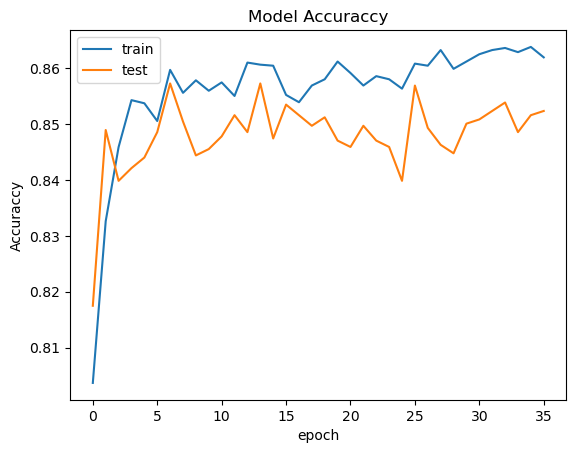

In [49]:
##Summarize history for accuraccy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuraccy")
plt.ylabel('Accuraccy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

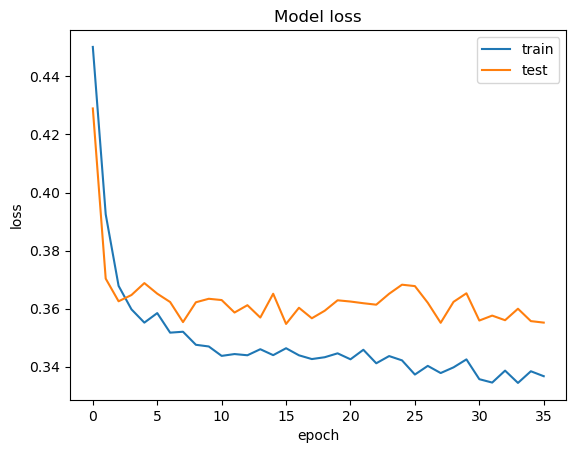

In [50]:
##Summarize history for accuraccy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [51]:
## Predicting the test results
ypred = classifier.predict(x_test)
ypred = (ypred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
## Make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[1547,   48],
       [ 220,  185]], dtype=int64)

In [53]:
## calculate the accuraccy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ypred)
score

0.866

In [54]:
## Get the weights
classifier.get_weights()

[array([[ 0.25201   ,  0.00515608,  0.5748958 , -0.17016487, -0.3041001 ,
          0.08826149, -0.29801896, -0.39006287, -0.01031379, -0.41056117,
         -0.31866878],
        [-2.5819404 , -0.10337882, -2.1757808 , -3.179746  ,  1.0283121 ,
          0.8394633 , -0.8758273 ,  0.57840943, -2.453153  ,  2.0461059 ,
         -0.10198954],
        [-0.7194127 ,  0.05246007,  0.01872547, -0.09581237, -1.1074232 ,
         -0.44449314,  0.19314365,  0.9565417 , -1.25887   ,  0.56101626,
         -0.05750427],
        [-0.84654737, -3.32643   , -1.3582007 , -0.4183008 , -0.22511268,
          1.7369907 ,  0.20870976, -0.69622386,  0.03670417, -1.2327297 ,
          0.5378816 ],
        [-0.6274034 , -3.7918115 ,  0.24033864,  0.55352414,  0.28392124,
          1.6876545 , -2.5043166 ,  0.77144927,  0.9160304 ,  0.0731185 ,
          3.7147958 ],
        [-1.1117727 , -0.19200493,  0.11375777, -0.01652667, -0.6211645 ,
          0.2163073 , -0.40350118,  0.07146558,  0.85363024,  0.1315006